## Libraries 

In [51]:
import numpy as np
# from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter('ignore')

## The purpose of this Sprint

<li>Understanding linear regression through scratch</li>
<li>Get used to object-oriented implementation</li>
<li>Allow formulas to be incorporated into code</li>

## How to learn
After implementing linear regression with scratch, we will train and verify.

## Scratch Linear Regression
We will create a class of linear regression from scratch. We will implement the algorithm using only the minimum library such as NumPy.


The template is prepared below. Add some code to this ScratchLinearRegression class.


In [11]:
# class ScratchLinearRegression():
#     """
#     Scratch implementation of linear regression

#     Parameters
#     ----------
#     num_iter : int
#       Number of iterations
#     lr : float
#       Learning rate
#     no_bias : bool
#       True if no bias term is included
#     verbose : bool
#       True to output the learning process

#     Attributes
#     ----------
#     self.coef_ : The following form of ndarray, shape (n_features,)
#       Parameters
#     self.loss : The following form of ndarray, shape (self.iter,)
#       Training dataに対する損失の記録
#     self.val_loss : The following form of ndarray, shape (self.iter,)
#       Validation dataに対する損失の記録
#     """

#     def __init__(self, num_iter, lr, no_bias=False, verbose=True):
#         # Record hyperparameters as attributes
#         self.iter = num_iter
#         self.lr = lr
#         self.no_bias = no_bias
#         self.verbose = verbose
#         # Prepare an array to record the loss
#         self.loss = np.zeros(self.iter)
#         self.val_loss = np.zeros(self.iter)

#     def fit(self, X, y, X_val=None, y_val=None):
#         """
#         線形回帰を学習する。Validation dataが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。
#         Parameters
#         ----------
#         X : The following forms of ndarray, shape (n_samples, n_features)
#             Training dataの特徴量
#         y : The following form of ndarray, shape (n_samples,)
#             Correct answer value of training data
#         X_val : The following forms of ndarray, shape (n_samples, n_features)
#             Validation dataの特徴量
#         y_val : The following form of ndarray, shape (n_samples,)
#             Correct value of verification data
#         """
#         if self.no_bias is not True:
#             x1 = self._linear_hypothesis(X)
#             self.coef = np.random.random(x1.shape[1])
#         else:
#             x1 = X
#             self.coef = np.random.random(x1.shape[1])
# #         if self.verbose:
#             #Output learning process when verbose is set to True
# #             print()
#         for x in range(0,self.iter):
#             y_pred = np.dot(x1,self.coef.T)
#             error = y_pred - y
#             self.loss[x] += np.mean(error**2)/2
#             ##
#             if X_val is not None:
#                 if self.no_bias is not True:
#                     x2 = self._linear_hypothesis(X_val)
#                 else:
#                     x2 = X_val
#                 y2 = np.dot(x2,self.coef)
#                 error_val = y2 - y_val
#                 self.val_loss[x] += np.mean(error_val**2)/2
#             ##
#             self._gradient_descent(x1, error)
#             if self.verbose:
#                 print("Iteration:",x," Losss: ",self.loss[x],' Weight: ', self.coef)
            

#     def predict(self, X):
#         """
#         Estimate using linear regression.
#         Parameters
#         ----------
#         X : The following forms of ndarray, shape (n_samples, n_features)
#             sample
#         Returns
#         -------
#             The following form of ndarray, shape (n_samples, 1)
#             Estimated result by linear regression
#         """
#         if self.no_bias is not True:
#             return np.dot(self._linear_hypothesis(X),self.coef)
#         return np.dot(X,self.coef)
#     def _linear_hypothesis(self, X):
#         """
#         Compute a linear hypothetical function
#         Parameters
#         ----------
#         X : The following forms of ndarray, shape (n_samples, n_features)
#           Training data
#         Returns
#         -------
#           The following form of ndarray, shape (n_samples, 1)
#           Estimated result by linear hypothetical function
#         """
# #         return np.transpose(X)@self.coef_
#         x1 = X
#         x0 = np.ones(x1.shape[0]).reshape(-1, 1)
#         return np.concatenate([x0, x1],axis=1)
#     def _gradient_descent(self, X, error):
#         """
#         Write a description
#         """
#         self.coef = self.coef - self.lr*np.dot(error,X)/len(X)
#     def MSE(y_pred, y):
#         """
#         Calculation of mean square error
#         Parameters
#         ----------
#         y_pred : 次の形のndarray, shape (n_samples,)
#           Estimated value
#         y : 次の形のndarray, shape (n_samples,)
#           Correct answer value
#         Returns
#         ----------
#         mse : numpy.float
#           Mean squared error
#         """
#         mse = (1/len(y_pred))* np.sum(np.square(y_pred - y))
#         return mse
#     def getCoef(self):
#         return np.array(self.coef)

In [175]:
class ScratchLinearRegression():
    """
    線形回帰のスクラッチ実装
    
    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue
    
    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      訓練データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証データに対する損失の記録
    """
    
    def __init__(self, num_iter=1000, lr=0.001, no_bias=False, verbose=False):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        
    def _linear_hypothesis(self,X):
        """
        線形の仮定関数を計算する

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          訓練データ

        Returns
        -------
          次の形のndarray, shape (n_samples, 1)
          線形の仮定関数による推定結果

        """
        x1 = X
        x0 = np.ones(x1.shape[0]).reshape(-1, 1)
    
        return np.concatenate([x0, x1],axis=1)
    
    def _gradient_descent(self, X, error):
        """
        最急降下法により、θの値を更新し、学習する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        error : 真の値と推定した値の誤差
        """
        self.theta = self.theta - self.lr*np.dot(error,X)/len(X)
        
    def fit(self, X, y, X_val=None, y_val=None):
        """
        線形回帰を学習する。
        検証データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        
        # バイアス項有無で分岐
        if self.no_bias is not True:   
            # パラメータθの初期値を乱数で与える
            x1 = self._linear_hypothesis(X)
            # θはXの特徴量の種類の数分用意する
            self.theta = np.random.random(x1.shape[1])
            print("Shape:",x1.shape[1])
        else:
            x1 = X
            self.theta = np.random.random(x1.shape[1])
            print("Shape:",x1.shape[1])
        
        for i in range(self.iter):
            
            # 仮定関数で予測値を計算
            y1 = np.dot(x1,self.theta.T)
            
            # 真の値と予測値の誤差を計算
            print("Y1",y1.shape, " Y",y.shape)
            error = y1 - y
            self.loss[i] += np.mean(error**2)/2
            
            # X_validを入力した場合は、x2として読み込む
            if X_val is not None:
                if self.no_bias is not True:
                    x2 = self._linear_hypothesis(X_val)
                else:
                    x2 = X_val
                y2 = np.dot(x2,self.theta)
                
                error_val = y2 - y_val
                self.val_loss[i] += np.mean(error_val**2)/2 
            
            # パラメータθを最急降下法で、最適化
            self._gradient_descent(x1, error)
            print("Theta Shape",self.theta.shape)
            if self.verbose:
            #verboseをTrueにした際は学習過程を出力
                print('n_iter:', i,
                      'loss:',self.loss[i],
                      'theta:',self.theta)
                
    def predict(self, X):
        """
        線形回帰を使い推定する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """
        if self.no_bias is not True:
            return np.dot(self._linear_hypothesis(X),self.theta)
        return np.dot(X,self.theta)

In [5]:
data = pd.read_csv('train.csv')

In [95]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [152]:
X = data.loc[:,"LotArea"]
X.head()

0     8450
1     9600
2    11250
3     9550
4    14260
Name: LotArea, dtype: int64

In [153]:
Y = data.iloc[:,-1]
Y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(),Y.to_numpy(),test_size = 0.25)

In [100]:
X_train.shape

(1095,)

In [101]:
X_test.shape

(365,)

In [102]:
y_train.shape

(1095,)

In [103]:
y_test.shape

(365,)

In [104]:
X_train.reshape(-1,1).shape

(1095, 1)

In [105]:
X_train.shape

(1095,)

In [155]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train.reshape(-1,1))

X_train_trans = scaler.transform(X_train.reshape(-1,1))
X_test_trans = scaler.transform(X_test.reshape(-1,1))

In [107]:
my_model = ScratchLinearRegression(1000,0.02,False,True)

In [108]:
print(X_train_trans.shape)
print(y_train.shape)
print(X_test_trans.shape)
print(y_test.shape)


(1095, 1)
(1095,)
(365, 1)
(365,)


In [109]:
my_model.fit(X_train_trans,y_train,X_test_trans,y_test)

Shape: 2
Theta Shape (2,)
n_iter: 0 loss: 19664948615.600094 theta: [3629.04879629  417.83918746]
Theta Shape (2,)
n_iter: 1 loss: 19004706195.811493 theta: [7184.70321762  826.93380123]
Theta Shape (2,)
n_iter: 2 loss: 18370609375.846523 theta: [10669.24455053  1227.84652272]
Theta Shape (2,)
n_iter: 3 loss: 17761622789.952168 theta: [14084.09505678  1620.74098979]
Theta Shape (2,)
n_iter: 4 loss: 17176752072.859228 theta: [17430.6485529   2005.77756751]
Theta Shape (2,)
n_iter: 5 loss: 16615042236.16317 theta: [20710.27097911  2383.11341367]
Theta Shape (2,)
n_iter: 6 loss: 16075576109.000275 theta: [23924.30095678  2752.90254291]
Theta Shape (2,)
n_iter: 7 loss: 15557472840.47303 theta: [27074.05033491  3115.29588957]
Theta Shape (2,)
n_iter: 8 loss: 15059886461.379465 theta: [30160.80472547  3470.4413693 ]
Theta Shape (2,)
n_iter: 9 loss: 14582004502.898005 theta: [33185.82402822  3818.48393943]
Theta Shape (2,)
n_iter: 10 loss: 14123046669.97241 theta: [36150.34294492  4159.565658

Theta Shape (2,)
n_iter: 117 loss: 3139700295.1213584 theta: [164687.76038282  18948.39463598]
Theta Shape (2,)
n_iter: 118 loss: 3133857708.8237195 theta: [165022.24057243  18986.87814078]
Theta Shape (2,)
n_iter: 119 loss: 3128246488.943466 theta: [165350.03115824  19024.59197548]
Theta Shape (2,)
n_iter: 120 loss: 3122857473.3704715 theta: [165671.26593233  19061.55153348]
Theta Shape (2,)
n_iter: 121 loss: 3117681862.8141665 theta: [165986.07601095  19097.77190033]
Theta Shape (2,)
n_iter: 122 loss: 3112711206.435892 theta: [166294.58988799  19133.26785984]
Theta Shape (2,)
n_iter: 123 loss: 3107937388.050197 theta: [166596.93348749  19168.05390016]
Theta Shape (2,)
n_iter: 124 loss: 3103352612.8725753 theta: [166893.230215    19202.14421967]
Theta Shape (2,)
n_iter: 125 loss: 3098949394.791988 theta: [167183.60100796  19235.5527328 ]
Theta Shape (2,)
n_iter: 126 loss: 3094720544.147392 theta: [167468.16438506  19268.29307566]
Theta Shape (2,)
n_iter: 127 loss: 3090659155.988321 th

Theta Shape (2,)
n_iter: 247 loss: 2992932365.6836967 theta: [180201.92343921  20733.37140577]
Theta Shape (2,)
n_iter: 248 loss: 2992901789.391789 theta: [180226.12036768  20736.15537517]
Theta Shape (2,)
n_iter: 249 loss: 2992872423.92104 theta: [180249.83335759  20738.88366518]
Theta Shape (2,)
n_iter: 250 loss: 2992844221.3229337 theta: [180273.0720877   20741.55738939]
Theta Shape (2,)
n_iter: 251 loss: 2992817135.5477114 theta: [180295.84604321  20744.17763912]
Theta Shape (2,)
n_iter: 252 loss: 2992791122.369189 theta: [180318.1645196   20746.74548386]
Theta Shape (2,)
n_iter: 253 loss: 2992766139.312535 theta: [180340.03662647  20749.26197169]
Theta Shape (2,)
n_iter: 254 loss: 2992742145.584925 theta: [180361.4712912   20751.72812978]
Theta Shape (2,)
n_iter: 255 loss: 2992719102.0089283 theta: [180382.47726264  20754.1449647 ]
Theta Shape (2,)
n_iter: 256 loss: 2992696970.958541 theta: [180403.06311465  20756.51346292]
Theta Shape (2,)
n_iter: 257 loss: 2992675716.2977495 the

n_iter: 352 loss: 2992171333.0765867 theta: [181266.73640805  20855.88310083]
Theta Shape (2,)
n_iter: 353 loss: 2992170893.67592 theta: [181269.63707715  20856.21683633]
Theta Shape (2,)
n_iter: 354 loss: 2992170471.6755195 theta: [181272.47973286  20856.54389712]
Theta Shape (2,)
n_iter: 355 loss: 2992170066.3863354 theta: [181275.26553547  20856.86441669]
Theta Shape (2,)
n_iter: 356 loss: 2992169677.146603 theta: [181277.99562202  20857.17852588]
Theta Shape (2,)
n_iter: 357 loss: 2992169303.320763 theta: [181280.67110684  20857.48635287]
Theta Shape (2,)
n_iter: 358 loss: 2992168944.2984276 theta: [181283.29308196  20857.78802333]
Theta Shape (2,)
n_iter: 359 loss: 2992168599.4933763 theta: [181285.86261758  20858.08366038]
Theta Shape (2,)
n_iter: 360 loss: 2992168268.342605 theta: [181288.38076249  20858.37338469]
Theta Shape (2,)
n_iter: 361 loss: 2992167950.305404 theta: [181290.8485445   20858.65731451]
Theta Shape (2,)
n_iter: 362 loss: 2992167644.862477 theta: [181293.26697

Theta Shape (2,)
n_iter: 469 loss: 2992160335.290155 theta: [181398.12657495  20871.00015193]
Theta Shape (2,)
n_iter: 470 loss: 2992160331.401831 theta: [181398.39944071  20871.03154641]
Theta Shape (2,)
n_iter: 471 loss: 2992160327.6674848 theta: [181398.66684916  20871.062313  ]
Theta Shape (2,)
n_iter: 472 loss: 2992160324.081019 theta: [181398.92890944  20871.09246425]
Theta Shape (2,)
n_iter: 473 loss: 2992160320.636577 theta: [181399.18572851  20871.12201248]
Theta Shape (2,)
n_iter: 474 loss: 2992160317.328535 theta: [181399.4374112   20871.15096975]
Theta Shape (2,)
n_iter: 475 loss: 2992160314.151491 theta: [181399.68406023  20871.17934787]
Theta Shape (2,)
n_iter: 476 loss: 2992160311.100259 theta: [181399.92577629  20871.20715843]
Theta Shape (2,)
n_iter: 477 loss: 2992160308.169855 theta: [181400.16265802  20871.23441278]
Theta Shape (2,)
n_iter: 478 loss: 2992160305.3554945 theta: [181400.39480212  20871.26112204]
Theta Shape (2,)
n_iter: 479 loss: 2992160302.6525836 thet

Theta Shape (2,)
n_iter: 614 loss: 2992160237.380464 theta: [181411.04090918  20872.48600628]
Theta Shape (2,)
n_iter: 615 loss: 2992160237.3693643 theta: [181411.05548826  20872.48768367]
Theta Shape (2,)
n_iter: 616 loss: 2992160237.3587036 theta: [181411.06977575  20872.48932751]
Theta Shape (2,)
n_iter: 617 loss: 2992160237.348465 theta: [181411.0837775   20872.49093848]
Theta Shape (2,)
n_iter: 618 loss: 2992160237.3386326 theta: [181411.09749921  20872.49251722]
Theta Shape (2,)
n_iter: 619 loss: 2992160237.3291883 theta: [181411.11094648  20872.49406439]
Theta Shape (2,)
n_iter: 620 loss: 2992160237.3201194 theta: [181411.12412481  20872.49558062]
Theta Shape (2,)
n_iter: 621 loss: 2992160237.311409 theta: [181411.13703958  20872.49706653]
Theta Shape (2,)
n_iter: 622 loss: 2992160237.3030434 theta: [181411.14969605  20872.49852271]
Theta Shape (2,)
n_iter: 623 loss: 2992160237.295009 theta: [181411.16209939  20872.49994977]
Theta Shape (2,)
n_iter: 624 loss: 2992160237.287293 t

Theta Shape (2,)
n_iter: 745 loss: 2992160237.101569 theta: [181411.71818379  20872.56392988]
Theta Shape (2,)
n_iter: 746 loss: 2992160237.101513 theta: [181411.71921738  20872.5640488 ]
Theta Shape (2,)
n_iter: 747 loss: 2992160237.10146 theta: [181411.72023029  20872.56416534]
Theta Shape (2,)
n_iter: 748 loss: 2992160237.101408 theta: [181411.72122295  20872.56427955]
Theta Shape (2,)
n_iter: 749 loss: 2992160237.101359 theta: [181411.72219575  20872.56439147]
Theta Shape (2,)
n_iter: 750 loss: 2992160237.101311 theta: [181411.72314909  20872.56450116]
Theta Shape (2,)
n_iter: 751 loss: 2992160237.101266 theta: [181411.72408337  20872.56460865]
Theta Shape (2,)
n_iter: 752 loss: 2992160237.101222 theta: [181411.72499896  20872.56471399]
Theta Shape (2,)
n_iter: 753 loss: 2992160237.10118 theta: [181411.72589625  20872.56481723]
Theta Shape (2,)
n_iter: 754 loss: 2992160237.1011395 theta: [181411.72677558  20872.5649184 ]
Theta Shape (2,)
n_iter: 755 loss: 2992160237.1011004 theta: 

Theta Shape (2,)
n_iter: 870 loss: 2992160237.1001697 theta: [181411.76572706  20872.56939995]
Theta Shape (2,)
n_iter: 871 loss: 2992160237.100169 theta: [181411.76580978  20872.56940947]
Theta Shape (2,)
n_iter: 872 loss: 2992160237.1001687 theta: [181411.76589085  20872.5694188 ]
Theta Shape (2,)
n_iter: 873 loss: 2992160237.1001687 theta: [181411.76597029  20872.56942794]
Theta Shape (2,)
n_iter: 874 loss: 2992160237.1001678 theta: [181411.76604814  20872.56943689]
Theta Shape (2,)
n_iter: 875 loss: 2992160237.1001678 theta: [181411.76612444  20872.56944567]
Theta Shape (2,)
n_iter: 876 loss: 2992160237.100167 theta: [181411.76619921  20872.56945428]
Theta Shape (2,)
n_iter: 877 loss: 2992160237.100167 theta: [181411.76627249  20872.56946271]
Theta Shape (2,)
n_iter: 878 loss: 2992160237.100167 theta: [181411.7663443   20872.56947097]
Theta Shape (2,)
n_iter: 879 loss: 2992160237.1001663 theta: [181411.76641467  20872.56947907]
Theta Shape (2,)
n_iter: 880 loss: 2992160237.1001663 

In [110]:
y_pred = my_model.predict(X_test_trans)

Root mean square error 74328.05499681557


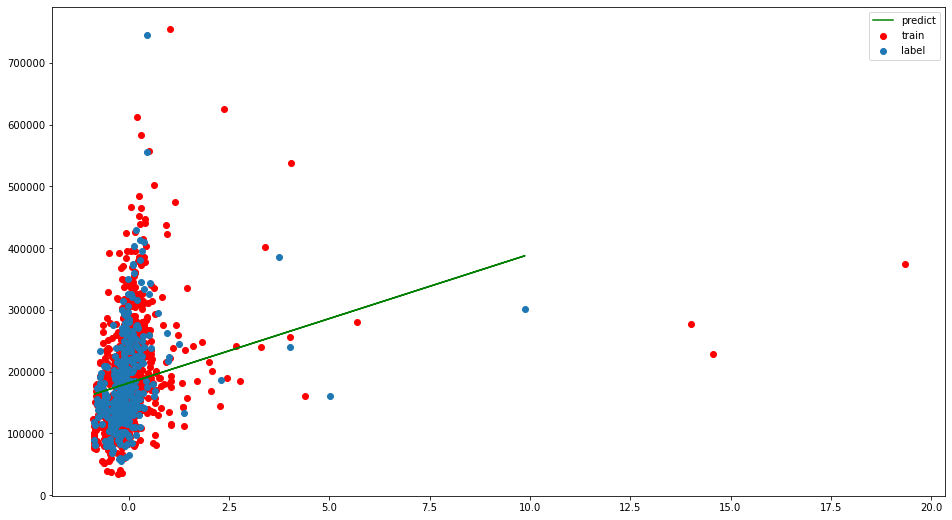

In [113]:
fig = plt.figure(figsize=(16, 9))
plt.scatter(X_train_trans, y_train, label='train',color='Red')
plt.plot(X_test_trans, y_pred, label='predict',color='Green')
plt.scatter(X_test_trans, y_test, label='label')
plt.legend()

# mse = my_model.MSE(y_pred)
# mse = (1/len(y_pred))* np.sum(np.square(y_pred - y_test))
mse = MSE(y_pred,y_test)
print("Root mean square error",np.sqrt(mse));

In [136]:
my_model.val_loss.shape

(1000,)

In [137]:
my_model.loss.shape

(1000,)

## Problem1: Hypothetical function
Implement the linear regression hypothetical function represented by the following formula. I have prepared a method template
<center>$ h​ ​θ​ ​(​ ​x​ ​)​ ​=​ ​θ​ ​0​ ​x​ ​0​ ​+​ ​θ​ ​1​ ​x​ ​1​ ​+​ ​.​ ​.​ ​.​ ​+​ ​θ​ ​j​ ​x​ ​j​ ​+​ ​.​ ​.​ ​.​ ​+​ ​θ​ ​n​ ​x​ ​n​ ​.​ ​(​ ​x​ ​0​ ​=​ ​1​ ​)$ </center>

$x$: Feature vector
$\theta$: parameter vector


$n$: Number of features


$x_j$: jth feature


$\theta_j$: jth parameter (weight)

The feature quantity $ n $ should be implemented so that it can correspond to any value.
The vector format is as follows.
h
​ ​
θ
​ ​
(
​ ​
x
​ ​
)
​ ​
=
​ ​
θ
​ ​
T
​ ​
⋅
​ ​
x
​ ​
.

Since it is a method that is never called from outside the class, it is customary in Python to prefix it with an underscore.
```
def _linear_hypothesis(self, X):
    """
    Compute a linear hypothetical function
    Parameters
    ----------
    X : The following forms of ndarray, shape (n_samples, n_features)
      Training data
    Returns
    -------
      The following form of ndarray, shape (n_samples, 1)
      Estimated result by linear hypothetical function
    """
    pass
    return
```

In [124]:
def _linear_hypothesis(self,X):
        """
        線形の仮定関数を計算する

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          訓練データ

        Returns
        -------
          次の形のndarray, shape (n_samples, 1)
          線形の仮定関数による推定結果

        """
        x1 = X
        x0 = np.ones(x1.shape[0]).reshape(-1, 1)
    
        return np.concatenate([x0, x1],axis=1)

## Problem2: Steepest descent
Implement the steepest descent method for training. Add a method _gradient_descent that updates the parameters as in the following equation, and
Please it call from the fit method.
θ
​ ​
j
​ ​
: =
​ ​
θ
​ ​
j
​ ​
−
​ ​
α
​ ​
1
​ ​
m
​ ​ 
m
​ ​
∑
​ ​	
i
​ ​
=
​ ​
1
 ​ ​
[
​ ​
(
​ ​
h
​ ​
θ
​ ​
(
​ ​
x
​ ​
(
​ ​
i
​ ​
)
​ ​
)
​ ​
−
​ ​
y
​ ​
(
​ ​
i
​ ​
)
​ ​
)
​ ​
x
​ ​
(
​ ​
i
​ ​
)
​ ​
j
​ ​
]

$\alpha$: learning rate

$i$: sample index

$j$: Feature index

Add the following method to the ScratchLinearRegression class. Please also describe the commented out part.
```
def _gradient_descent(self, X, error):
    """
    Write a description
    """
    pass
```

In [125]:
def _gradient_descent(self, X, error):
        """
        最急降下法により、θの値を更新し、学習する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        error : 真の値と推定した値の誤差
        """
        self.theta = self.theta - self.lr*np.dot(error,X)/len(X)

## Problem 3: Estimated
Please implement the estimation mechanism. Add it to the predict method included in the template of the ScratchLinearRegression class.


The output of the hypothetical function $h_\theta(x)$ is the estimation result.

In [134]:
def predict(self, X):
        """
        線形回帰を使い推定する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """
        if self.no_bias is not True:
            return np.dot(self._linear_hypothesis(X),self.theta)
        return np.dot(X,self.theta)

## Problem 4: Mean squared error
Create a function of mean square error (MSE) used as an index value for linear regression.


Since the mean square error function is a function that can be used for regression problems in general, create it as a separate function instead of the method of the ScratchLinearRegression class. We have a template.


The mean square error is expressed by the following formula.

L
​ ​
(
​ ​
θ
​ ​
)
​ ​
=
​ ​
1
​ ​
m
​ ​ 
m
​ ​
∑
​ ​	
i
​ ​
=
​ ​
1
 ​ ​
(
​ ​
h
​ ​
θ
​ ​
(
​ ​
x
​ ​
(
​ ​
i
​ ​
)
​ ​
)
​ ​
−
​ ​
y
​ ​
(
​ ​
i
​ ​
)
​ ​
)
​ ​
2
​ ​
.

$m$: Number of input data


$h_\theta()$: Assumption function


$x^{(i)}$: Feature vector of the i-th sample


$y^{(i)}$: Correct value of i-th sample

As the objective function (loss function) for the steepest descent method, divide this by 2 and use it. (Problems 5, 9)

```
def MSE(y_pred, y):
    """
    Calculation of mean square error
    Parameters
    ----------
    y_pred : 次の形のndarray, shape (n_samples,)
      Estimated value
    y : 次の形のndarray, shape (n_samples,)
      Correct answer value
    Returns
    ----------
    mse : numpy.float
      Mean squared error
    """
    pass
    return mse
```

In [112]:
def MSE(y_pred, y):
    """
    Calculation of mean square error
    Parameters
    ----------
    y_pred : 次の形のndarray, shape (n_samples,)
      Estimated value
    y : 次の形のndarray, shape (n_samples,)
      Correct answer value
    Returns
    ----------
    mse : numpy.float
      Mean squared error
    """
    (1/len(y_pred))* np.sum(np.square(y_pred - y))
    return mse

## Problem 5: Objective function
Implement the objective function (loss function) of linear regression represented by the following formula and be sure to record this inself.loss,self.val_loss.


The objective function (loss function) $J(\theta)$ is the following formula.

J
​ ​
(
​ ​
θ
​ ​
)
​ ​
=
​ ​
1
​ ​
2
​ ​
m
​ ​ 
m
​ ​
∑
​ ​	
i
​ ​
=
​ ​
1
 ​ ​
(
​ ​
h
​ ​
θ
​ ​
(
​ ​
x
​ ​
(
​ ​
i
​ ​
)
​ ​
)
​ ​
−
​ ​
y
​ ​
(
​ ​
i
​ ​
)
​ ​
)
​ ​
2
​ ​
.

$m$: Number of input data


$h_\theta()$: Assumption function


$x^{(i)}$: Feature vector of the i-th sample


$y^{(i)}$: Correct value of i-th sample

## Problem 6: Learning and estimation
Learn and estimate scratch implementations from the House Prices competition data provided in Sprint, an introduction to machine learning scratch.


Compare this with the scikit-learn implementation and see if it works correctly.

## Problem 7: Learning curve plot
Create and execute a function that displays the learning curve. Look at the graph to see if the loss is down properly.


In the template of the linear regression class, the loss is recorded in self.loss and self.val_loss, so please use this for input.

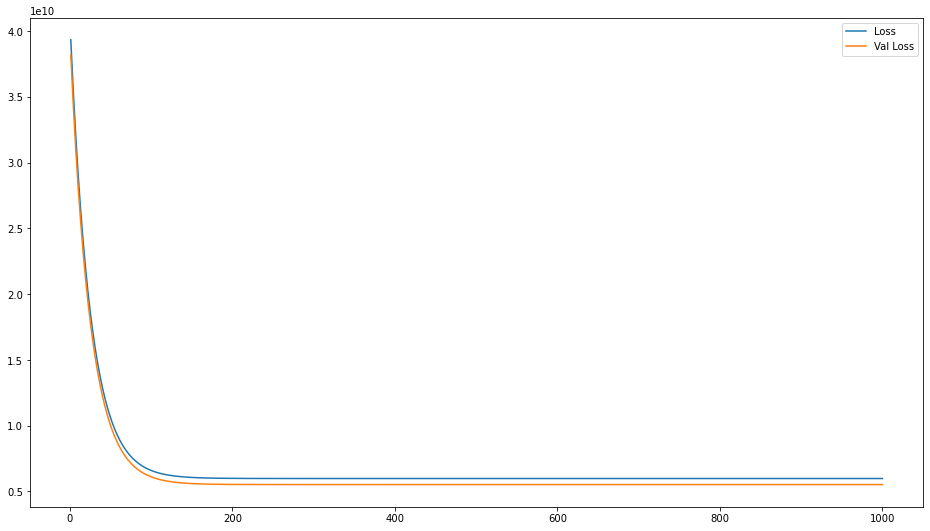

In [169]:
fig = plt.figure(figsize=(16,9))
plt.plot(np.arange(start=1, stop=1001, step=1),np.array(my_model.loss),label='Loss')
plt.plot(np.arange(start=1, stop=1001, step=1),np.array(my_model.val_loss),label='Val Loss',)
_ = plt.legend()

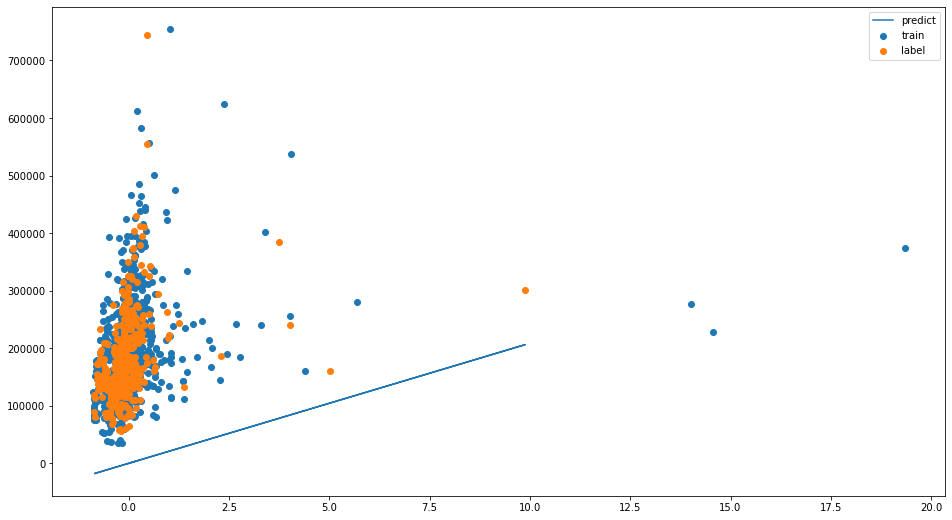

In [123]:
fig = plt.figure(figsize=(16, 9))
plt.scatter(X_train_trans, y_train, label='train')
plt.plot(X_test_trans, y_pred, label='predict')
plt.scatter(X_test_trans, y_test, label='label')
plt.legend()

## problem 8: (Advance task) Removal of bias term
Verify how learning changes when the bias term $\theta_0$ is removed. Also, consider and investigate the role of bias terms in linear regression models.

In [150]:
new_model = ScratchLinearRegression(1000,0.02,True,True)

In [156]:
new_model.fit(X_train_trans,y_train,X_test_trans,y_test)

Shape: 1
Theta Shape (1,)
n_iter: 0 loss: 19388525417.87674 theta: [427.8382609]
Theta Shape (1,)
n_iter: 1 loss: 19379470252.678333 theta: [846.990379]
Theta Shape (1,)
n_iter: 2 loss: 19370773672.021782 theta: [1257.75945474]
Theta Shape (1,)
n_iter: 3 loss: 19362421475.959232 theta: [1660.31314897]
Theta Shape (1,)
n_iter: 4 loss: 19354400026.86076 theta: [2054.81576932]
Theta Shape (1,)
n_iter: 5 loss: 19346696227.146584 theta: [2441.42833725]
Theta Shape (1,)
n_iter: 6 loss: 19339297497.901093 theta: [2820.30865383]
Theta Shape (1,)
n_iter: 7 loss: 19332191758.333717 theta: [3191.61136408]
Theta Shape (1,)
n_iter: 8 loss: 19325367406.05322 theta: [3555.48802012]
Theta Shape (1,)
n_iter: 9 loss: 19318813298.12302 theta: [3912.08714304]
Theta Shape (1,)
n_iter: 10 loss: 19312518732.866863 theta: [4261.5542835]
Theta Shape (1,)
n_iter: 11 loss: 19306473432.39484 theta: [4604.03208116]
Theta Shape (1,)
n_iter: 12 loss: 19300667525.821518 theta: [4939.66032286]
Theta Shape (1,)
n_iter:

Theta Shape (1,)
n_iter: 184 loss: 19159994649.709576 theta: [20876.18412961]
Theta Shape (1,)
n_iter: 185 loss: 19159989302.930588 theta: [20886.36933034]
Theta Shape (1,)
n_iter: 186 loss: 19159984167.88405 theta: [20896.35082705]
Theta Shape (1,)
n_iter: 187 loss: 19159979236.185352 theta: [20906.13269384]
Theta Shape (1,)
n_iter: 188 loss: 19159974499.78192 theta: [20915.71892328]
Theta Shape (1,)
n_iter: 189 loss: 19159969950.940067 theta: [20925.11342814]
Theta Shape (1,)
n_iter: 190 loss: 19159965582.232357 theta: [20934.3200429]
Theta Shape (1,)
n_iter: 191 loss: 19159961386.525463 theta: [20943.34252537]
Theta Shape (1,)
n_iter: 192 loss: 19159957356.968567 theta: [20952.18455818]
Theta Shape (1,)
n_iter: 193 loss: 19159953486.982124 theta: [20960.84975034]
Theta Shape (1,)
n_iter: 194 loss: 19159949770.247147 theta: [20969.34163866]
Theta Shape (1,)
n_iter: 195 loss: 19159946200.69487 theta: [20977.66368921]
Theta Shape (1,)
n_iter: 196 loss: 19159942772.49686 theta: [20985.8

Theta Shape (1,)
n_iter: 393 loss: 19159859659.07149 theta: [21377.97642225]
Theta Shape (1,)
n_iter: 394 loss: 19159859657.921772 theta: [21378.12577712]
Theta Shape (1,)
n_iter: 395 loss: 19159859656.81758 theta: [21378.2721449]
Theta Shape (1,)
n_iter: 396 loss: 19159859655.757114 theta: [21378.41558533]
Theta Shape (1,)
n_iter: 397 loss: 19159859654.738647 theta: [21378.55615695]
Theta Shape (1,)
n_iter: 398 loss: 19159859653.76051 theta: [21378.69391713]
Theta Shape (1,)
n_iter: 399 loss: 19159859652.821106 theta: [21378.82892211]
Theta Shape (1,)
n_iter: 400 loss: 19159859651.9189 theta: [21378.96122699]
Theta Shape (1,)
n_iter: 401 loss: 19159859651.052418 theta: [21379.09088578]
Theta Shape (1,)
n_iter: 402 loss: 19159859650.22026 theta: [21379.21795138]
Theta Shape (1,)
n_iter: 403 loss: 19159859649.421047 theta: [21379.34247568]
Theta Shape (1,)
n_iter: 404 loss: 19159859648.653484 theta: [21379.46450949]
Theta Shape (1,)
n_iter: 405 loss: 19159859647.916317 theta: [21379.584

Theta Shape (1,)
n_iter: 601 loss: 19159859630.04467 theta: [21385.332425]
Theta Shape (1,)
n_iter: 602 loss: 19159859630.04442 theta: [21385.33465983]
Theta Shape (1,)
n_iter: 603 loss: 19159859630.044167 theta: [21385.33684995]
Theta Shape (1,)
n_iter: 604 loss: 19159859630.04393 theta: [21385.33899628]
Theta Shape (1,)
n_iter: 605 loss: 19159859630.0437 theta: [21385.34109967]
Theta Shape (1,)
n_iter: 606 loss: 19159859630.043484 theta: [21385.343161]
Theta Shape (1,)
n_iter: 607 loss: 19159859630.04327 theta: [21385.34518111]
Theta Shape (1,)
n_iter: 608 loss: 19159859630.04307 theta: [21385.34716081]
Theta Shape (1,)
n_iter: 609 loss: 19159859630.042877 theta: [21385.34910092]
Theta Shape (1,)
n_iter: 610 loss: 19159859630.04269 theta: [21385.35100222]
Theta Shape (1,)
n_iter: 611 loss: 19159859630.042507 theta: [21385.3528655]
Theta Shape (1,)
n_iter: 612 loss: 19159859630.042336 theta: [21385.35469151]
Theta Shape (1,)
n_iter: 613 loss: 19159859630.04217 theta: [21385.35648101]


Theta Shape (1,)
n_iter: 804 loss: 19159859630.038174 theta: [21385.44231644]
Theta Shape (1,)
n_iter: 805 loss: 19159859630.03817 theta: [21385.44235343]
Theta Shape (1,)
n_iter: 806 loss: 19159859630.038174 theta: [21385.44238969]
Theta Shape (1,)
n_iter: 807 loss: 19159859630.038174 theta: [21385.44242522]
Theta Shape (1,)
n_iter: 808 loss: 19159859630.038174 theta: [21385.44246003]
Theta Shape (1,)
n_iter: 809 loss: 19159859630.038174 theta: [21385.44249416]
Theta Shape (1,)
n_iter: 810 loss: 19159859630.03817 theta: [21385.4425276]
Theta Shape (1,)
n_iter: 811 loss: 19159859630.03817 theta: [21385.44256037]
Theta Shape (1,)
n_iter: 812 loss: 19159859630.038174 theta: [21385.44259248]
Theta Shape (1,)
n_iter: 813 loss: 19159859630.038174 theta: [21385.44262396]
Theta Shape (1,)
n_iter: 814 loss: 19159859630.03817 theta: [21385.4426548]
Theta Shape (1,)
n_iter: 815 loss: 19159859630.038174 theta: [21385.44268503]
Theta Shape (1,)
n_iter: 816 loss: 19159859630.038174 theta: [21385.44

In [157]:
y_pred = new_model.predict(X_test_trans)

Root mean square error 74328.05499681557


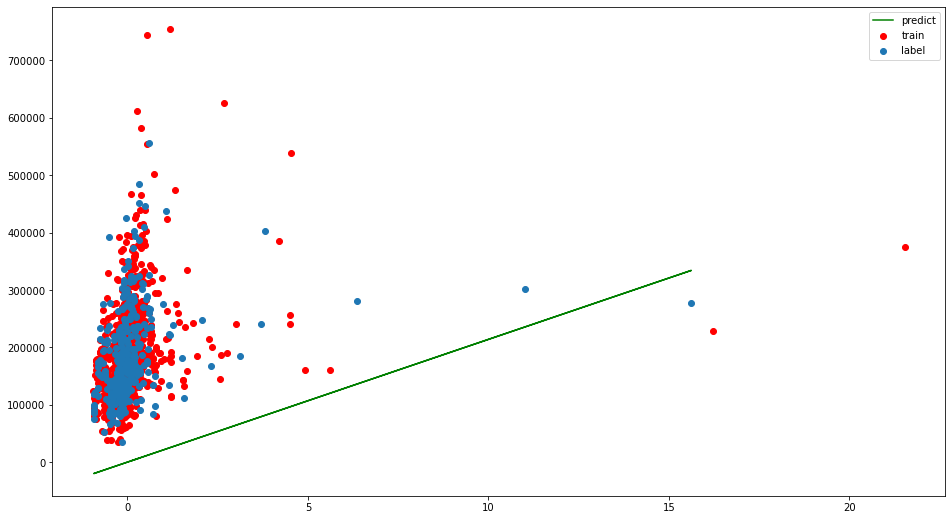

In [158]:
fig = plt.figure(figsize=(16, 9))
plt.scatter(X_train_trans, y_train, label='train',color='Red')
plt.plot(X_test_trans, y_pred, label='predict',color='Green')
plt.scatter(X_test_trans, y_test, label='label')
plt.legend()

# mse = my_model.MSE(y_pred)
# mse = (1/len(y_pred))* np.sum(np.square(y_pred - y_test))
mse = MSE(y_pred,y_test)
print("Root mean square error",np.sqrt(mse));

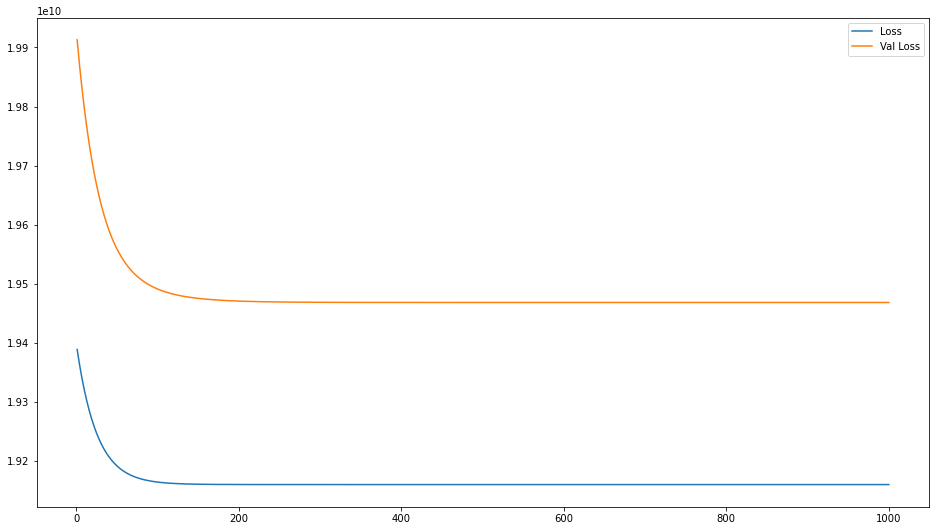

In [168]:
fig = plt.figure(figsize=(16,9))
plt.plot(np.arange(start=1, stop=1001, step=1),np.array(new_model.loss),label='Loss')
plt.plot(np.arange(start=1, stop=1001, step=1),np.array(new_model.val_loss),label='Val Loss',)
_ = plt.legend()

In linear regression, bias help to increase accuracy result for the models

## problem 9: (Advance task) Multidimensional feature quantity
Please verify how the learning result changes when the square or cube of the feature is used for input.

In [294]:
X = data[['YearBuilt', 'LotArea', 'MoSold']]
X.head()

,YearBuilt,LotArea,MoSold
0,2003,8450,2
1,1976,9600,5
2,2001,11250,9
3,1915,9550,2
4,2000,14260,12


In [297]:
X = X.values

In [303]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.25,random_state=2)

In [304]:
print("X_train.shape:", X_train.shape)
print("X_test.shape:", X_test.shape)
print("y_train.shape:", y_train.shape)
print("y_test.shape:", y_test.shape)

X_train.shape: (1095, 3)
X_test.shape: (365, 3)
y_train.shape: (1095,)
y_test.shape: (365,)


In [305]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train_trans = scaler.transform(X_train)
X_test_trans = scaler.transform(X_test)

In [306]:
print("X_train_trans.shape:", X_train_trans.shape)
print("X_test_trans.shape:", X_test_trans.shape)
print("y_train.shape:", y_train.shape)
print("y_test.shape:", y_test.shape)


X_train_trans.shape: (1095, 3)
X_test_trans.shape: (365, 3)
y_train.shape: (1095,)
y_test.shape: (365,)


In [291]:
multi_model = ScratchLinearRegression(1000,0.02,False,True)

In [307]:
multi_model.fit(X_train_trans,y_train,X_test_trans,y_test)

Shape: 4
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 0 loss: 38186371674.552795 theta: [3586.36354048  832.49211396  444.94131657  116.02730698]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 1 loss: 36869857326.70579 theta: [7100.56982218 1647.31191734  880.14251735  228.65376986]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 2 loss: 17757791995.847324 theta: [10544.49197825  2445.62301589  1306.32178837   338.70314248]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 3 loss: 17129564153.520933 theta: [13919.5356912   3227.76007894  1723.66601495   446.23354643]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 4 loss: 16526246478.850164 theta: [17227.07852989  3994.0509875   2132.35821388   551.3018074 ]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 5 loss: 15946851202.474045 theta: [20468.4705118   4744.816972    2532.57761348   653.96348381]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 6 loss: 15390429725.091532 theta: [23645.03465407  5480.37274725  2924.49973193   754.27289481]

Theta Shape (4,)
n_iter: 109 loss: 2122299616.7679777 theta: [159868.16716381  36738.68779189  19291.57909096   4606.59503512]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 110 loss: 2114016588.958583 theta: [160256.73737304  36826.33956125  19335.84779069   4615.11436483]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 111 loss: 2106061933.1022968 theta: [160637.53617809  36912.21783843  19379.19698888   4623.428444  ]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 112 loss: 2098422630.699069 theta: [161010.71900704  36996.35852915  19421.64576672   4631.54208352]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 113 loss: 2091086179.3966842 theta: [161376.43817941  37078.79681176  19463.21280977   4639.45998377]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 114 loss: 2084040572.5260382 theta: [161734.84296834  37159.56715199  19503.91641615   4647.18673709]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 115 loss: 2077274279.4478543 theta: [162086.07966148  37238.70331737  19543.7745045

Theta Shape (4,)
n_iter: 234 loss: 1914687273.8107758 theta: [177741.79014385  40735.44422703  21267.27467196   4936.55727179]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 235 loss: 1914634495.6725595 theta: [177772.88789349  40742.26738105  21270.47445015   4936.88846306]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 236 loss: 1914583809.440676 theta: [177803.36368813  40748.95270376  21273.60758265   4937.21032138]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 237 loss: 1914535132.1974952 theta: [177833.22996688  40755.50298121  21276.67545594   4937.52308815]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 238 loss: 1914488384.312147 theta: [177862.49892005  40761.92094313  21279.67942771   4937.82699887]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 239 loss: 1914443489.3102355 theta: [177891.18249416  40768.20926401  21282.62082744   4938.12228324]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 240 loss: 1914400373.748715 theta: [177919.29239679  40774.37056427  21285.50095695

Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 303 loss: 1913437414.1151 theta: [178910.93450466  40990.63048866  21384.91708684   4946.29351596]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 304 loss: 1913434173.7133248 theta: [178918.64936708  40992.30055951  21385.66495315   4946.32870011]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 305 loss: 1913431061.7340405 theta: [178926.20993225  40993.93692553  21386.39721436   4946.36251817]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 306 loss: 1913428073.0874665 theta: [178933.61928611  40995.5402674   21387.11419567   4946.39501083]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 307 loss: 1913425202.8855526 theta: [178940.8804529   40997.11125202  21387.8162155    4946.42621771]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 308 loss: 1913422446.433984 theta: [178947.99639636  40998.65053285  21388.50358563   4946.45617736]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 309 loss: 1913419799.2245038 theta: [178954.97002094  41000.158

Theta Shape (4,)
n_iter: 394 loss: 1913357711.6056876 theta: [179235.31964213  41060.45513466  21415.48335445   4946.87381149]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 395 loss: 1913357629.8439565 theta: [179236.5468018   41060.71664441  21415.59283008   4946.86970834]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 396 loss: 1913357551.3221471 theta: [179237.74941827  41060.97288313  21415.70001495   4946.86558368]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 397 loss: 1913357475.9118698 theta: [179238.92798242  41061.22395716  21415.80495692   4946.86144003]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 398 loss: 1913357403.4898202 theta: [179240.08297528  41061.46997064  21415.90770286   4946.85727981]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 399 loss: 1913357333.937583 theta: [179241.21486829  41061.71102567  21416.00829863   4946.85310536]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 400 loss: 1913357267.1414342 theta: [179242.32412343  41061.94722223  21416.106789

Theta Shape (4,)
n_iter: 508 loss: 1913355668.778832 theta: [179290.54503873  41072.15957601  21420.24194163   4946.51716318]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 509 loss: 1913355667.9643228 theta: [179290.66769047  41072.18529152  21420.25171751   4946.51556   ]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 510 loss: 1913355667.1820846 theta: [179290.78788917  41072.21048957  21420.26128795   4946.51397872]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 511 loss: 1913355666.4308388 theta: [179290.9056839   41072.23518055  21420.27065725   4946.5124191 ]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 512 loss: 1913355665.7093573 theta: [179291.02112273  41072.25937469  21420.27982962   4946.51088092]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 513 loss: 1913355665.0164607 theta: [179291.13425279  41072.28308199  21420.2888092    4946.50936393]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 514 loss: 1913355664.3510172 theta: [179291.24512024  41072.30631226  21420.297600

Theta Shape (4,)
n_iter: 569 loss: 1913355649.9664292 theta: [179294.88935049  41073.06780305  21420.57964765   4946.45162221]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 570 loss: 1913355649.8972518 theta: [179294.92511599  41073.07524861  21420.58231879   4946.45097096]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 571 loss: 1913355649.8308148 theta: [179294.96016619  41073.08254447  21420.58493365   4946.45032979]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 572 loss: 1913355649.7670095 theta: [179294.99451537  41073.08969365  21420.58749339   4946.44969857]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 573 loss: 1913355649.7057326 theta: [179295.02817758  41073.09669909  21420.58999918   4946.44907715]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 574 loss: 1913355649.6468828 theta: [179295.06116654  41073.1035637   21420.59245215   4946.44846539]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 575 loss: 1913355649.5903647 theta: [179295.09349572  41073.1102903   21420.59485

Theta Shape (4,)
n_iter: 638 loss: 1913355648.3275778 theta: [179296.23398266  41073.34698214  21420.6771879    4946.42418568]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 639 loss: 1913355648.3233247 theta: [179296.24285552  41073.34881696  21420.67780061   4946.42397297]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 640 loss: 1913355648.3192403 theta: [179296.25155092  41073.35061493  21420.67840035   4946.42376378]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 641 loss: 1913355648.3153179 theta: [179296.26007241  41073.35237679  21420.67898741   4946.42355807]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 642 loss: 1913355648.3115506 theta: [179296.26842347  41073.35410326  21420.67956205   4946.42335578]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 643 loss: 1913355648.3079324 theta: [179296.27660752  41073.35579506  21420.68012454   4946.42315685]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 644 loss: 1913355648.3044574 theta: [179296.28462788  41073.35745289  21420.68067

Theta Shape (4,)
n_iter: 734 loss: 1913355648.2224307 theta: [179296.61383789  41073.42533091  21420.702406     4946.41404225]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 735 loss: 1913355648.2223427 theta: [179296.61511364  41073.42559292  21420.70248419   4946.41400152]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 736 loss: 1913355648.222258 theta: [179296.61636388  41073.42584968  21420.70256071   4946.4139615 ]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 737 loss: 1913355648.2221773 theta: [179296.61758912  41073.42610128  21420.70263561   4946.41392218]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 738 loss: 1913355648.2220995 theta: [179296.61878984  41073.42634784  21420.70270891   4946.41388354]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 739 loss: 1913355648.222025 theta: [179296.61996656  41073.42658946  21420.70278064   4946.41384559]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 740 loss: 1913355648.2219532 theta: [179296.62111974  41073.42682622  21420.7028508

Theta Shape (4,)
n_iter: 792 loss: 1913355648.2204258 theta: [179296.65786274  41073.43436193  21420.70502282   4946.41255332]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 793 loss: 1913355648.2204175 theta: [179296.65825799  41073.43444288  21420.7050452    4946.41253881]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 794 loss: 1913355648.2204094 theta: [179296.65864535  41073.43452222  21420.7050671    4946.41252456]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 795 loss: 1913355648.2204018 theta: [179296.65902495  41073.43459996  21420.70508854   4946.41251057]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 796 loss: 1913355648.2203944 theta: [179296.65939696  41073.43467614  21420.70510951   4946.41249682]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 797 loss: 1913355648.220387 theta: [179296.65976153  41073.4347508   21420.70513004   4946.41248332]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 798 loss: 1913355648.22038 theta: [179296.66011882  41073.43482396  21420.70515013

Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 861 loss: 1913355648.2202265 theta: [179296.67272272  41073.43740283  21420.70583301   4946.41197589]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 862 loss: 1913355648.2202258 theta: [179296.67282078  41073.43742288  21420.70583802   4946.41197174]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 863 loss: 1913355648.2202253 theta: [179296.67291688  41073.43744252  21420.70584292   4946.41196766]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 864 loss: 1913355648.2202246 theta: [179296.67301105  41073.43746177  21420.70584772   4946.41196365]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 865 loss: 1913355648.2202241 theta: [179296.67310334  41073.43748064  21420.70585241   4946.41195972]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 866 loss: 1913355648.2202237 theta: [179296.67319378  41073.43749912  21420.705857     4946.41195586]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 867 loss: 1913355648.2202234 theta: [179296.67328242  41073

Theta Shape (4,)
n_iter: 975 loss: 1913355648.2202132 theta: [179296.67713554  41073.43830465  21420.70604568   4946.41177581]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 976 loss: 1913355648.2202132 theta: [179296.67714534  41073.43830665  21420.70604609   4946.4117753 ]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 977 loss: 1913355648.2202134 theta: [179296.67715495  41073.43830861  21420.70604649   4946.41177481]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 978 loss: 1913355648.2202134 theta: [179296.67716436  41073.43831054  21420.70604688   4946.41177432]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 979 loss: 1913355648.2202132 theta: [179296.67717358  41073.43831242  21420.70604727   4946.41177384]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 980 loss: 1913355648.2202134 theta: [179296.67718262  41073.43831427  21420.70604765   4946.41177337]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 981 loss: 1913355648.2202132 theta: [179296.67719148  41073.43831608  21420.70604

In [312]:
y_pred = multi_model.predict(X_test_trans)
mse = MSE(y_pred,y_test)
print("Mean square error",mse)
print("root mean square error",np.sqrt(mse))

Mean square error 5524659759.60964
root mean square error 74328.05499681557


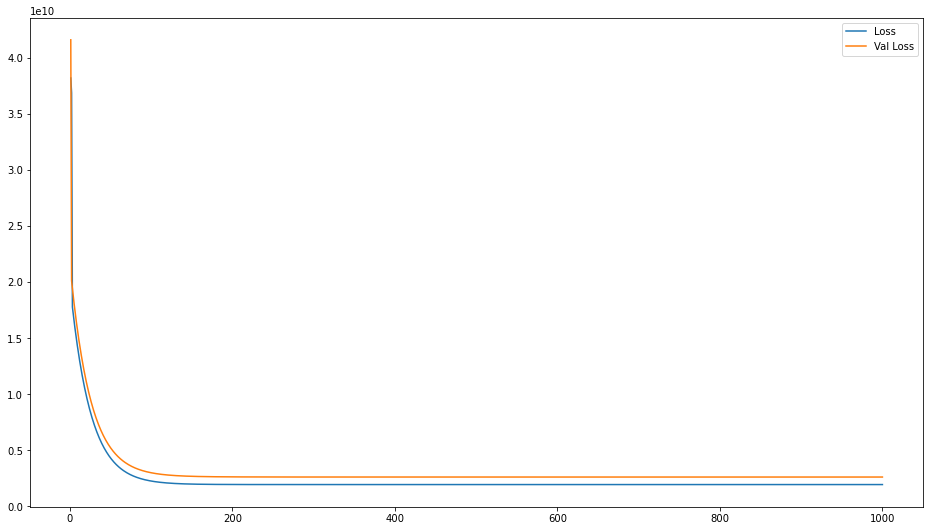

In [314]:
fig = plt.figure(figsize=(16,9))
plt.plot(np.arange(start=1, stop=1001, step=1),np.array(multi_model.loss),label='Loss')
plt.plot(np.arange(start=1, stop=1001, step=1),np.array(multi_model.val_loss),label='Val Loss',)
_ = plt.legend()

## problem 10: (Advance task) Derivation of update formula
The update formula for the steepest descent method was as follows. Explain the process by which this equation is derived.

<center> $θ_{j} = θ_{j} -  α \frac{1}{m} \sum_{1}^{m} {[h_{θ}(x^{(i)}) - y^{(i)} ) x_{j}^{(i)}]}$ </center>


You can start the explanation with the following formula.

<center> $θ_{j} = θ_{j} - \frac{∂}{∂θ_{j}} J(θ) $ </center>


Objective function (loss function) J(θ)Is the following formula.

<center>$ J(θ) = \frac{1}{2m} \sum_{1}^{m} {(h_{θ}(x^{(i)}) - y^{(i)} )^{2}}$ </center>

### Explanation
From the formular $J(θ) = \frac{1}{2m} \sum {(h_{θ}(x^{(i)}) - y^{(i)} )^{2}}$ 

I got
$J(θ) = \frac{1}{n} || y - \hat y ||^{2}$

$= \frac{1}{m} ( y - \hat y )^{T} ( y - \hat y )$

$= \frac{1}{m} ( y - xw )^{T} ( y - xw )$

$= \frac{1}{m} (y^{T}y - 2w^{T}x^{T}y - w^{T}x^{T}xw)$

$L = \frac{J}{2}$ = $\frac{1}{2m} (y^{T}y - 2w^{T}x^{T}y - w^{T}x^{T}xw)$

Differentiate to ***L*** to ***θ***

$\frac{∂L}{∂θ} = \frac{∂}{∂θ} (y^{T}y - 2θ^{T}x^{T}y - θ^{T}x^{T}xθ)$

$= \frac{1}{2m} ( - 2x^{T}y - 2x^{T}xθ )$

$= \frac{1}{m} x^{T} (y - xθ)$

$ = \frac{1}{m} x^{T}(y - \hat y)$

#### Update theta

$θ_{j} = θ_{j} -  \frac{1}{m} \sum_{1}^{m} (y_{i} - \hat y_{i}) x_{ji}$

#### Multiply with learning rate

$θ_{j} = θ_{j} -   α\frac{1}{m} \sum_{1}^{m} (y_{i} - \hat y_{i}) x_{ji}$ or  $θ_{j} = θ_{j} -  α \frac{1}{m} \sum _{1}^{m} {[h_{θ}(x^{(i)}) - y^{(i)} ) x_{j}^{(i)}]}$

## Problem 11: (Advance task) Problem of local optimum solution
The steepest descent method generally has the problem of locally optimal solutions. However, with linear regression, you can always find the optimal solution if you continue learning. Please explain it using mathematical formulas and graphs for some reason.

### Explanation
The cost function of Linear Regression: <center>$ J(θ) = \frac{1}{2m} \sum_{1}^{m} {(h_{θ}(x^{(i)}) - y^{(i)} )^{2}}$ </center>

This is a quadratic function. The quadratic function is proved to be convex so it ensures that the minimum exist and it will reach the global minimum with correct learning rate. Here is the shape of quadratic function and how it find the global minimal.

![alt text](convex.png "Convex")